# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
medical

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

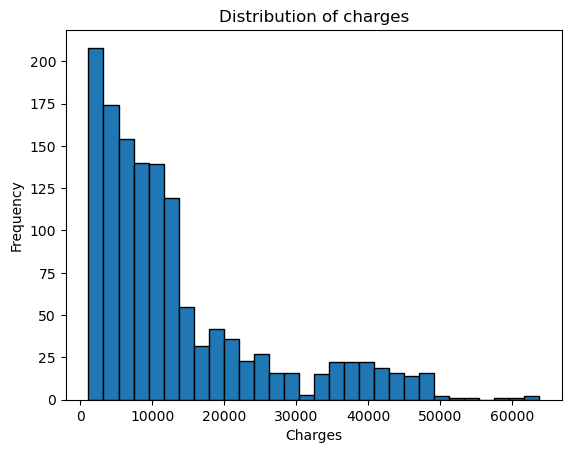

In [4]:
plt.hist(medical["charges"], bins = 30, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of charges')
plt.show()



In [5]:
mean = np.mean(medical["charges"])
mean

13270.422265141257

In [6]:
standard_deviation = np.std(medical["charges"])
standard_deviation

12105.484975561605

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The most appropriate frequentist test here would be a Z test because we know the sample standard deviation, the sample size is large which will ensure the sampling distribution follows the central limit theorem. The fact that the data represents a random sample of charges means that it is representative of the whole population. This reduces bias and allows statistical inference. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence interval should be one-sided because he specifically wants to know if the average charges have fallen belowe 12,000. This requires me to only measure towards one direction not two. I dont believe that the administrator should not be worried because after doing the z test I am 95% confident that the true population average charges fall within l2,726.07 and 13,814.78 which is not under 12,000 meaning the hospitals operational model should be fine. 


In [7]:
confidence_level = 0.95 


In [8]:
quantile = 1 - (1-0.95)
quantile

0.95

In [9]:
from scipy.stats import norm

critical_z_value = norm.ppf(quantile)
critical_z_value

1.6448536269514722

In [10]:
sample_size = 1338

In [11]:
standard_error = standard_deviation / np.sqrt(sample_size)
standard_error

330.943713906084

In [12]:
margin_error = critical_z_value * standard_error
margin_error

544.3539681352127

In [13]:
lower_bound = round(mean - margin_error,2)
lower_bound

12726.07

In [14]:
upper_bound = round(mean + margin_error,2)
upper_bound

13814.78

In [15]:
confidence_interval = lower_bound, upper_bound
confidence_interval

(12726.07, 13814.78)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null Hypothesis** : There is no difference in the average charges for people with insurance and those without insurance. **Alternative Hypothesis** : There is a difference in the average charges for people with insurance and those without insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Both ways gave me the same t statistic 11.89

In [16]:
insured_group = medical[medical["insuranceclaim"]== 1]["charges"]
insured_group

0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
           ...     
1330    12629.16560
1331    10795.93733
1334     2205.98080
1335     1629.83350
1337    29141.36030
Name: charges, Length: 783, dtype: float64

In [17]:
insured_group_size = len(insured_group)
insured_group_size

783

In [18]:
insured_group_mean = np.mean(insured_group)
insured_group_mean

16423.928276537677

In [19]:
insured_group_std = np.std(insured_group, ddof=1)
insured_group_std

14045.928418802127

In [20]:
non_insured_group = medical[medical["insuranceclaim"]== 0]["charges"]
non_insured_group

2        4449.46200
3       21984.47061
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1324     4239.89265
1328    22395.74424
1332    11411.68500
1333    10600.54830
1336     2007.94500
Name: charges, Length: 555, dtype: float64

In [21]:
non_insured_group_size = len(non_insured_group)
non_insured_group_size

555

In [22]:
non_insured_group_mean = np.mean(non_insured_group)
non_insured_group_mean

8821.421892306305

In [23]:
non_insured_group_std = np.std(non_insured_group, ddof=1)
non_insured_group_std

6446.510126811736

In [24]:
pooled_std = np.sqrt(((non_insured_group_size - 1) * (non_insured_group_std ** 2) + 
                      (insured_group_size - 1) * (insured_group_std ** 2)) / 
                      (non_insured_group_size + insured_group_size - 2))

pooled_std


11520.034268775256

In [25]:
standard_error = pooled_std * np.sqrt((1 / non_insured_group_size) + (1 / insured_group_size))
standard_error


639.2260351391293

In [26]:
t_statistic = (insured_group_mean - non_insured_group_mean) / standard_error
t_statistic


11.893299030876715

In [27]:
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(insured_group_mean, insured_group_std, insured_group_size, non_insured_group_mean, non_insured_group_std,
                     non_insured_group_size, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=11.893299030876719, pvalue=4.4612302316203985e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, I don't see a function in scipy.stats that specifically calculates a z-test. This is surprising, as z-tests are quite common in frequentist statistical inference, especially in cases where the population standard deviation is known.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test